In [1]:
# Importing the Dependencies
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
# Importing FashionMNSIT Dataset to Train
from torchvision import datasets
train_data = datasets.FashionMNIST(root = 'data', train=True, download=True, transform=ToTensor(),target_transform=None)
test_data = datasets.FashionMNIST(root = 'data', train=False, download=True, transform=ToTensor(),target_transform=None)

In [3]:
# Check for Cuda Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# Listing of train/test data
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

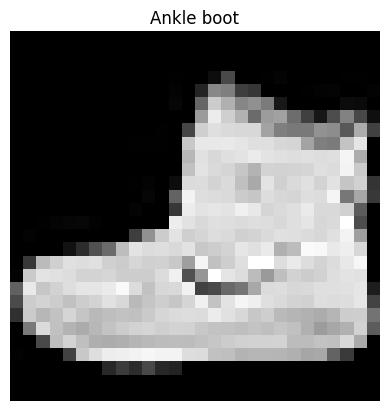

In [5]:
# Image output from Dataset
image, label = train_data[0]
image.shape
plt.imshow(image.squeeze(), cmap='gray')
class_names = train_data.classes
plt.title(class_names[label])
plt.axis(False)

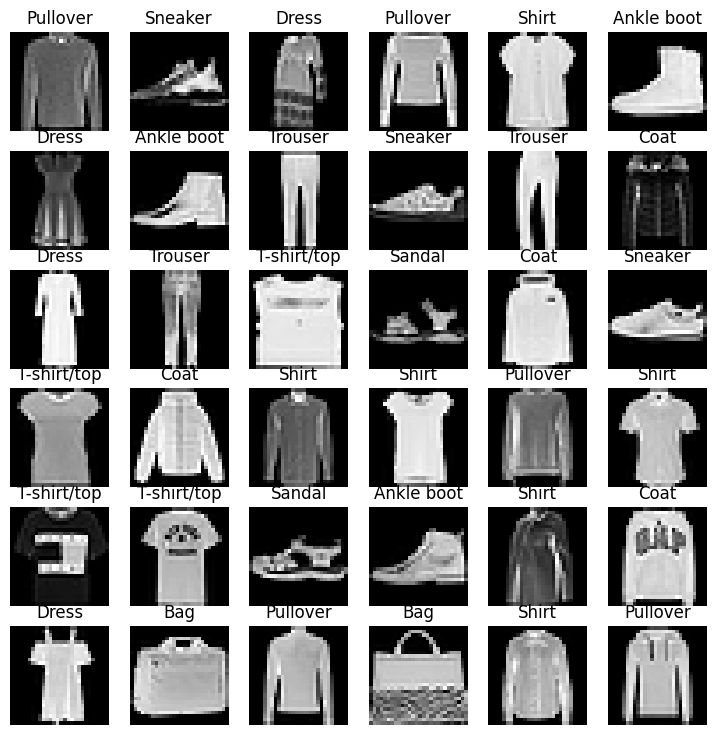

In [6]:
# Images from Dataset are plotted
torch.manual_seed(67)
fig = plt.figure(figsize=(9,9))
rows, col = 6, 6
for i in range(1, rows*col+1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows,col,i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

In [7]:
# Train/Test Data is Loaded and Divided into Batches to train the Model
from torch.utils.data import DataLoader
batch = 32
train_dataloader = DataLoader(dataset = train_data, batch_size=batch, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size=batch, shuffle = True)
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_dataloader, test_dataloader, train_features_batch.shape, train_labels_batch.shape

(<torch.utils.data.dataloader.DataLoader at 0x781a7adc12b0>,
 torch.Size([32, 1, 28, 28]),
 torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 3, Label size: torch.Size([])


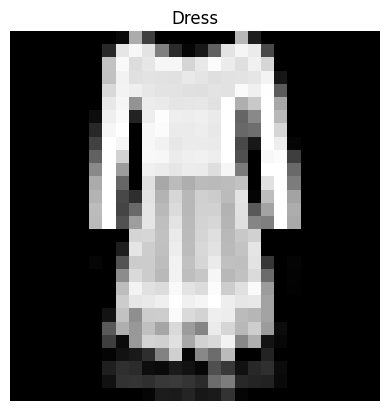

In [8]:
# Image is output from the loaded Train Data batch 
torch.manual_seed(54)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

In [9]:
# Train Features Batch is input in the Flatten Model
the_flatten_model = nn.Flatten()
x = train_features_batch[0]
output = the_flatten_model(x)
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [10]:
# Creation of FashionMNSIT0 Model of Sequential Layer
class FashionMNIST0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
               nn.Linear(in_features= input_shape, out_features= hidden_units),
               nn.Linear(in_features= hidden_units, out_features= output_shape))
    def forward (self, x):
        return self.layer_stack(x)
    
torch.manual_seed(54)
model_0 = FashionMNIST0(input_shape=784, hidden_units=10, output_shape=len(class_names)).to('cpu')
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0048,  0.0105,  0.0350,  ..., -0.0073, -0.0148,  0.0155],
                      [-0.0010,  0.0154, -0.0201,  ..., -0.0016, -0.0308, -0.0136],
                      [ 0.0310,  0.0236,  0.0022,  ..., -0.0248, -0.0297,  0.0322],
                      ...,
                      [ 0.0223, -0.0187, -0.0324,  ...,  0.0321, -0.0055,  0.0224],
                      [-0.0029,  0.0055, -0.0031,  ..., -0.0168, -0.0315, -0.0326],
                      [ 0.0086, -0.0148, -0.0176,  ...,  0.0263, -0.0341,  0.0180]])),
             ('layer_stack.1.bias',
              tensor([ 0.0175, -0.0333,  0.0120, -0.0131,  0.0157, -0.0094,  0.0133, -0.0190,
                      -0.0098,  0.0128])),
             ('layer_stack.2.weight',
              tensor([[-0.2332, -0.2071,  0.1406,  0.0911,  0.2594,  0.2039,  0.0819,  0.1861,
                       -0.1327,  0.2995],
                      [-0.2768,  0.1103, -0.0652, -0.0350,  0.2131,  0.1440, -0.

In [11]:
# Tensor is loaded in the model
tensor = torch.rand([1, 1, 28, 28])
model_0(tensor)

tensor([[-0.3026,  0.2656,  0.1274,  0.4819,  0.1445, -0.1301, -0.2700,  0.4325,
         -0.3441,  0.5857]], grad_fn=<AddmmBackward0>)

In [12]:
# Input of Loss Function, Optimizer and Accuracy Function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params=model_0.parameters(), lr=0.1) 

In [13]:
# Training time calculation
from timeit import default_timer as timer
def train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [14]:
# Creating a CPU train timer
start_time = timer()

end_time = timer()
print(f"Start time: {start_time}, End time: {end_time}")
train_time(start_time, end_time, 'cpu')

Start time: 5407.425779269, End time: 5407.425791046
Train time on cpu: 0.000 seconds


1.1777000509027857e-05

In [15]:
# Model_0 is trained and evaluated using batched data via training and testing loops.
from tqdm.auto import tqdm

torch.manual_seed(67)
training_start_time = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    
    train_loss_epoch = 0
    
    for batch, (X,y) in enumerate(train_dataloader):
        
        model_0.train()
        
        y_pred = model_0(X)
        
        loss = loss_fn(y_pred, y) 
        train_loss_epoch += loss.item()
        
        optim.zero_grad()
        
        loss.backward()
        
        optim.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            
    avg_train_loss = train_loss_epoch / len(train_dataloader)
    
    test_loss, test_acc = 0, 0
    
    model_0.eval()
    
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            
            test_pred = model_0(X_test)
            
            test_loss += loss_fn(test_pred, y_test).item()

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        avg_test_loss = test_loss / len(test_dataloader)
        avg_test_acc = test_acc / len(test_dataloader)
            
        print(f"\nTrain loss: {avg_train_loss:.4f} | Test loss: {avg_test_loss:.4f}, Test acc: {avg_test_acc:.4f}%")
        
training_end_time = timer()
train_time(start=training_start_time, end=training_end_time, device=str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5834 | Test loss: 0.5261, Test acc: 80.8606%
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4734 | Test loss: 0.5025, Test acc: 82.5579%
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4550 | Test loss: 0.4953, Test acc: 82.7975%
Epoch: 3
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4437 | Test loss: 0.5141, Test acc: 82.1286%
Epoch: 4
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400

13.734274913999798

In [16]:
# Run inference and obtain evaluation metrics for Model_0
from typing import Dict, Union, Callable, Any

torch.manual_seed(67)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn: Callable[[Any, Any], float]) -> Dict[str, Union[str, float]]:
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for data_batch in tqdm(data_loader):
            x_data, y_data = data_batch
            y_pred = model(x_data)
            
            loss += loss_fn(y_pred, y_data).item()
            acc += accuracy_fn(y_true=y_data,
                               y_pred=y_pred.argmax(dim=1))
        
        # Calculate averages AFTER the loop
        loss /= len(data_loader)
        acc /= len(data_loader)
            
        return {"Model_Name": model.__class__.__name__,
                "Model_Loss": loss,
                "Model_accuracy": acc}

model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'FashionMNIST0',
 'Model_Loss': 0.4969978601026078,
 'Model_accuracy': 82.30830670926518}

In [17]:
!nvidia-smi

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.cuda.is_available()

Wed Jun 11 18:28:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.57.04              Driver Version: 576.52         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   50C    P8              2W /  115W |     260MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

True

In [18]:
# Creation of FashionMNSIT1 Model of Sequential Layer using ReLU 
class FashionMNIST1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
               nn.Linear(in_features= input_shape, out_features= hidden_units),
               nn.ReLU(),
               nn.Linear(in_features= hidden_units, out_features= output_shape),
               nn.ReLU())
        
    def forward (self, x: torch.Tensor):
        return self.layer_stack(x)
    
torch.manual_seed(54)
model_1 = FashionMNIST1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0048,  0.0105,  0.0350,  ..., -0.0073, -0.0148,  0.0155],
                      [-0.0010,  0.0154, -0.0201,  ..., -0.0016, -0.0308, -0.0136],
                      [ 0.0310,  0.0236,  0.0022,  ..., -0.0248, -0.0297,  0.0322],
                      ...,
                      [ 0.0223, -0.0187, -0.0324,  ...,  0.0321, -0.0055,  0.0224],
                      [-0.0029,  0.0055, -0.0031,  ..., -0.0168, -0.0315, -0.0326],
                      [ 0.0086, -0.0148, -0.0176,  ...,  0.0263, -0.0341,  0.0180]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0175, -0.0333,  0.0120, -0.0131,  0.0157, -0.0094,  0.0133, -0.0190,
                      -0.0098,  0.0128], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[-0.2332, -0.2071,  0.1406,  0.0911,  0.2594,  0.2039,  0.0819,  0.1861,
                       -0.1327,  0.2995],
                      [-0

In [19]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [20]:
# Input of Loss Function, Optimizer and Accuracy Function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [21]:
# Training step function for model_1
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss_epoch, train_acc = 0, 0
    
    model.train()
    
    for batch, (X,y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y) 
        train_loss_epoch += loss.item()
        train_acc += accuracy_fn(y_true=y,
                                 y_pred = y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()

    avg_train_loss = train_loss_epoch / len(data_loader)
    avg_train_acc = train_acc / len(data_loader)
    print(f"Train loss: {avg_train_loss:.5f} | Train acc: {avg_train_acc:.2f}%")


In [22]:
# Test step function for model_1
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    
    test_loss, test_acc = 0, 0
    
    model.eval()
    
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            test_pred = model(X_test)
            
            test_loss += loss_fn(test_pred, y_test).item()

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        avg_test_loss = test_loss / len(data_loader)
        avg_test_acc = test_acc / len(data_loader)
            
        print(f"\nTest loss: {avg_test_loss:.4f}, Test acc: {avg_test_acc:.4f}%\n")
        
    return {"test_loss": avg_test_loss, "test_acc": avg_test_acc}

In [23]:
# Training and testing loop for model_1 on GPU
torch.manual_seed(56)

from timeit import default_timer as timer

train_time_start_on_gpu = timer()
epochs = 5

for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-----")
    
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optim,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print(f"Train time on {device}: {train_time_end_on_gpu - train_time_start_on_gpu:.3f} seconds")

Epoch: 0
-----
Train loss: 0.92450 | Train acc: 67.42%

Test loss: 0.7054, Test acc: 74.4708%

Epoch: 1
-----
Train loss: 0.68390 | Train acc: 75.23%

Test loss: 0.7024, Test acc: 74.2612%

Epoch: 2
-----
Train loss: 0.65125 | Train acc: 76.18%

Test loss: 0.6604, Test acc: 75.7288%

Epoch: 3
-----
Train loss: 0.63377 | Train acc: 76.62%

Test loss: 0.6410, Test acc: 76.1482%

Epoch: 4
-----
Train loss: 0.62139 | Train acc: 76.95%

Test loss: 0.6588, Test acc: 75.7388%

Train time on cuda: 21.244 seconds


In [24]:
# Run inference and obtain evaluation metrics for Model_1
from typing import Dict, Union, Callable, Any

torch.manual_seed(67)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn: Callable[[Any, Any], float],
               device: torch.device = device) -> Dict[str, Union[str, float]]:
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for data_batch in tqdm(data_loader):

            x_data, y_data = data_batch
            x_data, y_data = x_data.to(device), y_data.to(device)
            
            y_pred = model(x_data)
            
            loss += loss_fn(y_pred, y_data).item()
            acc += accuracy_fn(y_true=y_data,
                              y_pred=y_pred.argmax(dim=1))
        
        # Calculate averages AFTER the loop
        loss /= len(data_loader)
        acc /= len(data_loader)
            
        return {"Model_Name": model.__class__.__name__,
                "Model_Loss": loss,
                "Model_accuracy": acc}
        
model_1_results = eval_model(model=model_1,
                           data_loader=test_dataloader,
                             loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'FashionMNIST1',
 'Model_Loss': 0.6588963230673116,
 'Model_accuracy': 75.7488019169329}

In [25]:
# Creating a Convolutional Neural Network (CNN)
class FashionMNIST2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
        
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x


In [26]:
image.shape

torch.Size([1, 28, 28])

In [27]:
# 
torch.manual_seed(54)
model_2 = FashionMNIST2(input_shape=1,
                        hidden_units=10,
                        output_shape=len(class_names)).to(device)

model_2

FashionMNIST2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [28]:
import torch

torch.manual_seed(54)
image = torch.rand(size=(35,3,64,12))
test_image = image[0]
test_image.shape

torch.Size([3, 64, 12])

In [29]:
conv_layer = nn.Conv2d(in_channels=3,
                    out_channels=10,
                    kernel_size=3,
                    padding=0,
                    stride=1)
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 10])

In [30]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 10])

In [31]:
conv_layer_2 = nn.Conv2d(in_channels=3,
                        out_channels=10,
                        kernel_size=5,
                        stride=2,
                        padding=0)

# Print out the shapes of the weight and bias tensors
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape}")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape}")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5])

conv_layer_2 bias shape: 
torch.Size([10])


In [32]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict({'weight': tensor([[[[ 0.1024,  0.0928,  0.0614,  0.0322, -0.0943],
          [ 0.0208, -0.0161,  0.0584,  0.0973, -0.1052],
          [-0.0530, -0.0385,  0.0842,  0.0189,  0.1045],
          [-0.0661, -0.0454, -0.0941, -0.0291, -0.0013],
          [ 0.1146,  0.0964, -0.0732, -0.0543,  0.0479]],

         [[-0.0113,  0.0501, -0.0560,  0.0768, -0.1143],
          [ 0.0381, -0.0051, -0.0380, -0.0876,  0.0997],
          [-0.0409,  0.0326,  0.0551,  0.0484, -0.0585],
          [ 0.0675, -0.0794, -0.0433, -0.0796, -0.0973],
          [-0.1070,  0.1134,  0.0897, -0.0243,  0.0236]],

         [[-0.0905, -0.0617,  0.0464,  0.1021,  0.0540],
          [ 0.0049,  0.0211,  0.0442, -0.1154,  0.1091],
          [ 0.1011,  0.0600,  0.0796, -0.0898, -0.0215],
          [ 0.1108,  0.0633, -0.0496, -0.0816, -0.0479],
          [ 0.0753, -0.0715,  0.0134, -0.0378, -0.1131]]],


        [[[-0.0839,  0.0074,  0.0277,  0.0383, -0.0007],
          [-0.1011, -0.0385,  0.0682,  0.0447,  0.0013],


In [33]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params=model_2.parameters(), 
                                lr=0.1) 

In [34]:
# Training and testing loop for model_2 on GPU
torch.manual_seed(56)

from timeit import default_timer as timer
train_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optim,
        accuracy_fn=accuracy_fn,
        device=device)
    
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device)

train_end_model_2 = timer()
total_time_model_2 = print(f"Train time on {device}: {train_end_model_2 - train_start_model_2:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.21500 | Train acc: 54.08%

Test loss: 0.4546, Test acc: 83.4565%

Epoch: 1
---------
Train loss: 0.39711 | Train acc: 85.54%

Test loss: 0.3720, Test acc: 86.4916%

Epoch: 2
---------
Train loss: 0.34369 | Train acc: 87.64%

Test loss: 0.3472, Test acc: 87.2704%

Train time on cuda: 17.358 seconds


In [35]:
# model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'FashionMNIST2',
 'Model_Loss': 0.3475040999559549,
 'Model_accuracy': 87.27036741214057}

In [36]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,Model_Name,Model_Loss,Model_accuracy
0,FashionMNIST0,0.496998,82.308307
1,FashionMNIST1,0.658896,75.748802
2,FashionMNIST2,0.347504,87.270367


Text(0, 0.5, 'model')

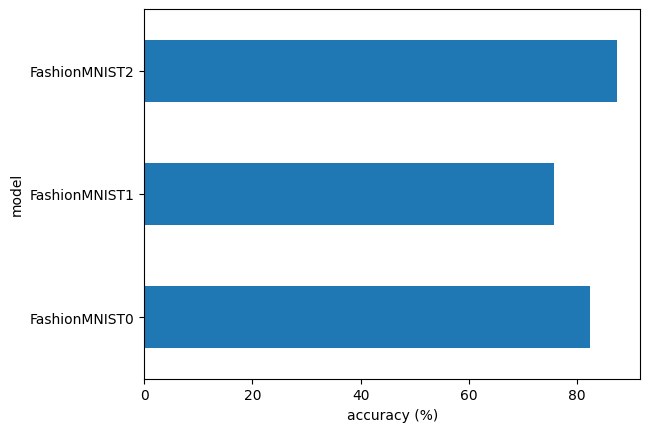

In [37]:
compare_results.set_index("Model_Name")["Model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [38]:
# Make predictions function with our model and data
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [39]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [40]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

pred_probs[:2]

tensor([[8.5993e-07, 3.6166e-09, 1.1627e-08, 3.2102e-09, 2.0747e-09, 9.9717e-01,
         4.8429e-07, 5.6122e-06, 4.9740e-05, 2.7688e-03],
        [3.5534e-02, 7.7186e-01, 4.1634e-03, 1.7498e-01, 8.7871e-03, 2.4421e-05,
         4.4558e-03, 2.0365e-05, 1.6859e-04, 1.1101e-05]])

In [41]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

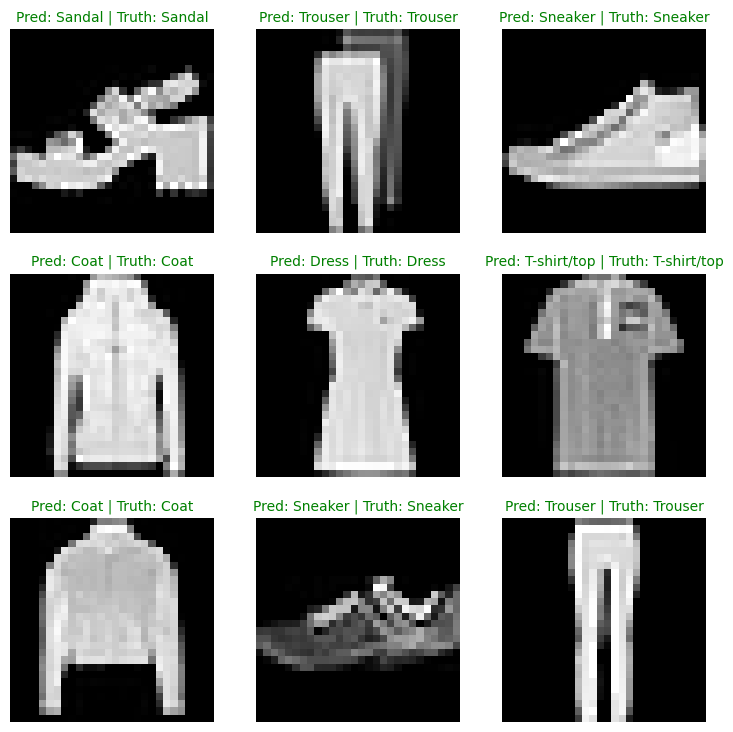

In [42]:
# Plot predictions and truth labels for model 2
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]] 

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g")
  else:
      plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);

In [43]:
# Making predictions using trained model_2
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
  
    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

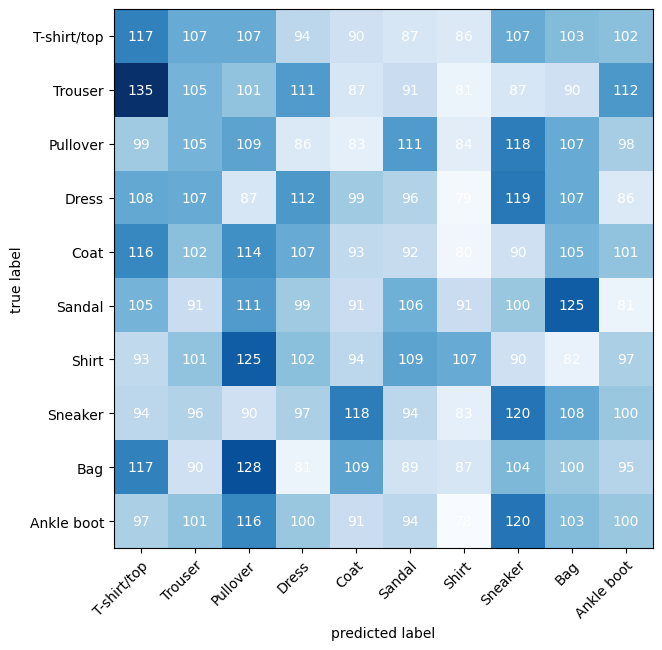

In [44]:
# Confusion matrix 
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=class_names,
    figsize=(10, 7)
);

In [45]:
# Create models directory and save model state dict
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                exist_ok=True
)

MODEL_NAME = "cnn_fashionmnist_87p6acc.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/cnn_fashionmnist_87p6acc.pth


In [46]:
# Load model state dict
loaded_model = FashionMNIST2(input_shape=1, 
                        hidden_units=10,
                        output_shape=10) 
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model = loaded_model.to(device)

In [47]:
# Evaluate loaded model
torch.manual_seed(72)

loaded_model_2_results = eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'FashionMNIST2',
 'Model_Loss': 0.34752890317679974,
 'Model_accuracy': 87.28035143769968}

In [50]:
# Check to see if results are close to each other
torch.isclose(torch.tensor(model_2_results["Model_Loss"]), 
            torch.tensor(loaded_model_2_results["Model_Loss"]),
            atol=1e-08,
            rtol=0.0001)

tensor(True)